In [1]:
import pandas as pd
from snowflake.snowpark.functions import col
from snowflake.ml.modeling.xgboost import XGBRegressor
import snowflake.snowpark as snowpark
from snowflake.snowpark import Session

In [ ]:
connection_parameters = {
    "account": "auffckh-zp48025",        # 예: xy12345.ap-northeast-2
    "user": "jinoo13",          # 예: JIN
    "password": "Bbodong2zzang!",
    "role": "ACCOUNTADMIN",              # 예: SYSADMIN
    "warehouse": "PO3_WH",    # 예: COMPUTE_WH
    "database": "PO3",
    "schema": "POPULATION"
}

# 1. 세션 생성
session = Session.builder.configs(connection_parameters).create()
df = session.table('PO3.POPULATION.SNOWPARK_TEST').select(
    col("TOTAL_HOUSEHOLDS").cast("FLOAT").alias("TOTAL_HOUSEHOLDS"),
    col("JEONSE_PRICE_PER_SUPPLY_PYEONG").cast("FLOAT").alias("JEONSE_PRICE_PER_SUPPLY_PYEONG"),
    col("MEME_PRICE_PER_SUPPLY_PYEONG").cast("FLOAT").alias("MEME_PRICE_PER_SUPPLY_PYEONG")
).na.drop()


# 2. Snowpark DataFrame -> Pandas DataFrame (XGBoost 모델이 pandas 입력 받음)
pdf = df.to_pandas()

# 3. feature, label 컬럼 정의
FEATURE_COLS = ["TOTAL_HOUSEHOLDS", "JEONSE_PRICE_PER_SUPPLY_PYEONG"]
LABEL_COLS = ["MEME_PRICE_PER_SUPPLY_PYEONG"]
OUTPUT_COLS = ["PREDICTED_PRICE"]

# 4. XGBRegressor 모델 생성
xgb_model = XGBRegressor(
    input_cols=FEATURE_COLS,
    label_cols=LABEL_COLS,
    output_cols=OUTPUT_COLS
)

# 5. Snowpark DataFrame으로 다시 변환 (fit, predict는 Snowpark DataFrame 필요)
sf_df = session.create_dataframe(pdf)

# 6. 모델 학습
xgb_model.fit(sf_df)

# 7. 예측 수행
predictions = xgb_model.predict(sf_df)

# 8. 예측 결과 출력
predictions.show()

predictions.write.mode('overwrite').save_as_table('PO3.POPULATION.SNOWPARK_PRED_RESULT_V2')
# return predictions

The version of package 'snowflake-snowpark-python' in the local environment is 1.35.0, which does not fit the criteria for the requirement 'snowflake-snowpark-python'. Your UDF might not work when the package version is different between the server and your local environment.
Package 'snowflake-telemetry-python' is not installed in the local environment. Your UDF might not work when the package is installed on the server but not on your local environment.
c:\Users\4-2025010176\anaconda3\envs\upstage_api_test\lib\site-packages\snowflake\ml\model\model_signature.py:71: UserWarning: The sample input has 4356 rows. Using the first 100 rows to define the inputs and outputs of the model and the data types of each. Use `signatures` parameter to specify model inputs and outputs manually if the automatic inference is not correct.
  warnings.warn(


--------------------------------------------------------------------------------------------------------------
|"TOTAL_HOUSEHOLDS"  |"JEONSE_PRICE_PER_SUPPLY_PYEONG"  |"MEME_PRICE_PER_SUPPLY_PYEONG"  |"PREDICTED_PRICE"  |
--------------------------------------------------------------------------------------------------------------
|1132.0              |2094.633345695                    |3795.682997305                  |3919.030517578125  |
|1132.0              |2247.200968291                    |4176.80443862                   |4359.35205078125   |
|1132.0              |2213.35621181                     |4158.39250767                   |4258.578125        |
|1132.0              |2213.108516615                    |4125.332265306                  |4258.578125        |
|1132.0              |2137.268563172                    |4169.127371105                  |4068.467041015625  |
|1132.0              |2049.050058025                    |4160.350430705                  |3938.69091796875   |
|

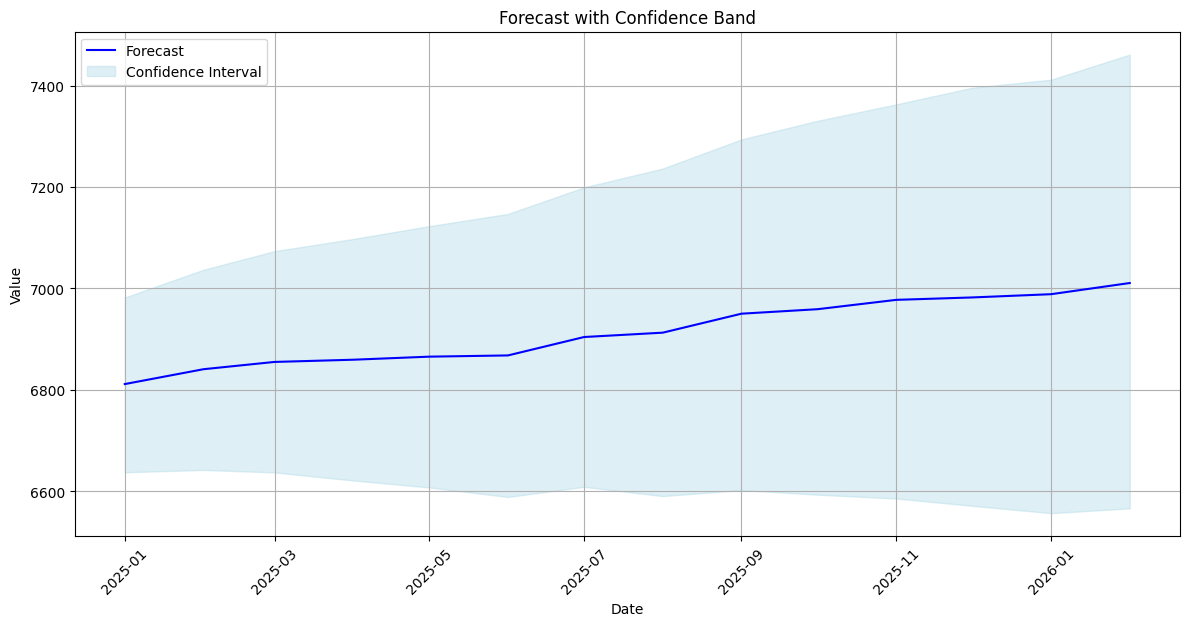

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = session.table('PO3.POPULATION.MY_FORECASTS_2025_07_28')
df = df.to_pandas()

df['TS'] = pd.to_datetime(df['TS'])

# 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(df['TS'], df['FORECAST'], label='Forecast', color='blue')
plt.fill_between(df['TS'], df['LOWER_BOUND'], df['UPPER_BOUND'], color='lightblue', alpha=0.4, label='Confidence Interval')

# 그래프 설정
plt.title('Forecast with Confidence Band')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [ ]:
from tqdm import tqdm
import time
import random
import os

def pretend_to_work():
    data = [random.randint(1, 1000) for _ in range(1000)]
    results = []
    for _ in range(10):
        result = sum([x ** 0.5 for x in data])
        results.append(result)
    return results

def fake_file_write(index):
    with open(f"temp_output.txt", "w") as f:
        for _ in range(10):
            f.write("Working...\n")
            time.sleep(0.01)

def fake_file_read(index):
    try:
        with open(f"temp_output.txt", "r") as f:
            return f.readlines()
    except FileNotFoundError:
        return []

def generate_dummy_data():
    return [random.random() for _ in range(10000)]

def process_dummy_data(data):
    return [x * random.random() for x in data]

def print_status(i):
    if i % 10 == 0:
        print(f"[INFO] Step {i}: Everything seems normal.")

def clean_up(index):
    try:
        os.remove(f"temp_output.txt")
    except FileNotFoundError:
        pass

for i in tqdm(range(1000000000000000000), desc="Pretending to work"):
    time.sleep(random.uniform(0.01, 0.05))  # 살짝 지연

    if i % 3 == 0:
        _ = pretend_to_work()

    if i % 4 == 0:
        dummy_data = generate_dummy_data()
        _ = process_dummy_data(dummy_data)

    if i % 5 == 0:
        fake_file_write(i)

    if i % 6 == 0:
        _ = fake_file_read(i)

    print_status(i)

    if i % 7 == 0:
        clean_up(i)
